## Math 693A: Homework 1

Stephen Giang

RedID: 823184070

Due: 9-18-24

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Problem 1

Program the steepest descent and Newton algorithms using the backtracking line search. Use them to minimize the Rosenbrock function
$$f(\bar{x}) = 100(x_2 - x_1^2)^2 + (1 - x_1)^2$$
Set the initial step length $\alpha_0 = 1$ and report the step length used by each method at each iteration. First try the initial point $\bar{x}_0^{T} = [1.2, 1.2]$ and then the more difficult point $\bar{x}_0^{T} = [-1.2, 1]$

Suggested values: $\bar{\alpha} = 1, \rho = \frac{1}{2}, c=10^{-4}$

&emsp; a. Stop when $||\nabla f(\vec{x}_k)|| < 10^{-8}$.

&emsp; You should hand in (i) your code (ii) the first 6 and last 6 values of $\vec{x}_k$ obtained from your program for steepest descent and Newton algorithms and (iii) determine the minimizer of the Rosenbrock function $x*$.

&emsp; b. Repeat (a.) above but stop when $| f(\vec{x}_k)| < 10^{-8}$. Compare your results with those from (a.) and discuss your observation with regards to number of iterations required in order to achieve convergence.

#### Solution 1

$$f(\bar{x}) = 100(x_2 - x_1^2)^2 + (1 - x_1)^2$$
$$\nabla f(\bar{x}) = \begin{bmatrix} 
\partial f / \partial x_1 \\
\partial f / \partial x_2 
\end{bmatrix} = \begin{bmatrix}
200(x_2 - x_1^2)(-2x_1) - 2(1 - x_1) \\
200(x_2 - x_1^2) \\
\end{bmatrix} = \begin{bmatrix}
-400x_1x_2 + 400x_1^3 - 2 + 2x_1 \\
200x_2 - 200x_1^2 \\
\end{bmatrix}$$
$$\nabla^2 f(\bar{x}) = \begin{bmatrix} 
\partial^2 f / \partial x_1^2 & \partial^2 f / \partial x_1 \partial x_2 \\
\partial^2 f / \partial x_2x_1 & \partial^2 f / \partial x_2^2 
\end{bmatrix} = \begin{bmatrix}
-400x_2 + 1200x_1^2 + 2 & -400x_1 \\
-400x_1 & 200
\end{bmatrix}$$

In [2]:
def find_alpha(xk, f, grad, hess, method='SD', alpha_bar=1, rho=0.5, c=1e-4):
    alpha = alpha_bar
    p = 1
    if method == 'SD':
        p = -grad(xk) / np.linalg.norm(grad(xk))
    else:
        p = -np.matmul(np.linalg.inv(hess(xk)), grad(xk))
    while f(xk + alpha * p) > f(xk) + c * alpha  * np.matmul(np.transpose(p), grad(xk)):
        alpha *= rho
    return alpha, p

In [3]:
def backtrack_linesearch(x0, tol, max_iterations, f, grad, hess, method='SD', tol_mode = 'GRAD', alpha_bar=1, rho=0.5, c=1e-4):
    i = 0
    xk = x0
    xk_list = []
    fxk_list = []
    ngxk_list = []
    p_list = []
    a_list = []
    while i < max_iterations and \
        ((tol_mode == 'GRAD' and np.linalg.norm(grad(xk)) > tol) or \
            (tol_mode != 'GRAD' and np.linalg.norm(f(xk)) > tol)):
        a, p = find_alpha(x0, f, grad, hess, method, alpha_bar, rho, c)
        xk_list.append(xk.copy())
        fxk_list.append(f(xk))
        ngxk_list.append(np.linalg.norm(grad(xk)))
        p_list.append(p)
        a_list.append(a)
        i += 1
        xk += a * p

    xk_list.append(xk)
    fxk_list.append(f(xk))
    ngxk_list.append(np.linalg.norm(grad(xk)))
    p_list.append('-')
    a_list.append('-')

    d = {"x_k^T": xk_list, 'f(x_k)': fxk_list, 'p_k': p_list, 'alpha_k':a_list, '||grad(x_k)||': ngxk_list}
    return pd.DataFrame(data=d)


In [4]:
def f(x):
    return 100 * (x[1] - (x[0]**2))**2 + (1 - x[0])**2
def grad(x):
    return np.array([(-400*x[0]*x[1]) + (400*x[0]**3) - (2) + (2 * x[0]), (200*x[1]) - (200*x[0]**2)])
def hess(x):
    return np.array([[-400*x[1] + 1200*x[0]**2 + 2, -400*x[0]], [-400*x[0], 200]])

In [5]:
method = []
x0_list = []
stopping_criteria = []
num_iter = []

#### Solution 1a

In [6]:
x0 = np.array([1.2, 1.2])
x0_list.append(x0.copy())
a = backtrack_linesearch(x0, 1e-8, 1e5, f, grad, hess, method='N', tol_mode='GRAD')
method.append('Newton')
stopping_criteria.append('||grad(x_k)|| < 1e-8}')
num_iter.append(len(a) - 1)
if (len(a) > 12):
    display(a.head(6))
    display(a.tail(6))
else:
    display(a)

,x_k^T,f(x_k),p_k,alpha_k,||grad(x_k)||
0,"[1.2, 1.2]",5.800000e+00,"[-0.004081632653060607, 0.2302040816326545]",1,1.251693e+02
1,"[1.1959183673469393, 1.4302040816326544]",3.838403e-02,"[-0.19526774595264068, -0.46703190814528334]",0.5,3.998201e-01
2,"[1.098284494370619, 1.1966881275600127]",1.876234e-02,"[-0.0337963351118008, -0.06469527862477475]",1,4.784866e+00
3,"[1.064488159258818, 1.131992848935238]",4.289183e-03,"[-0.05249604412853717, -0.11062064249852371]",1,6.563523e-01
4,"[1.0119921151302809, 1.0213722064367143]",9.032733e-04,"[-0.007731028105129378, -0.012891644319337758]",1,1.265832e+00
5,"[1.0042610870251516, 1.0084805621173767]",1.851409e-05,"[-0.004210752701698793, -0.008397621375241957]",1,3.465826e-02
6,"[1.0000503343234528, 1.0000829407421348]",3.397039e-08,"[-5.015646423718297e-05, -8.258753934298202e-05]",1,8.019780e-03
7,"[1.0000001778592156, 1.000000353202792]",3.226676e-14,"[-1.7785912186877985e-07, -3.532026362758192e-07]",1,1.451948e-06
8,"[1.0000000000000937, 1.0000000000001557]",1.096016e-25,-,-,1.440371e-11


In [7]:
x0 = np.array([-1.2, 1])
x0_list.append(x0.copy())
a = backtrack_linesearch(x0, 1e-8, 1e5, f, grad, hess, method='N', tol_mode='GRAD')
method.append('Newton')
stopping_criteria.append('||grad(x_k)|| < 1e-8')
num_iter.append(len(a) - 1)
if (len(a) > 12):
    display(a.head(6))
    display(a.tail(6))
else:
    display(a)

,x_k^T,f(x_k),p_k,alpha_k,||grad(x_k)||
0,"[-1.2, 1.0]",24.200000,"[0.02471910112359521, 0.3806741573033716]",1,232.867688
1,"[-1.1752808988764047, 1.3806741573033716]",4.731884,"[1.938395770053172, -4.555708012052268]",0.125,4.639426
2,"[-0.9329814276197582, 0.8112106557968382]",4.087399,"[0.1504413486489058, -0.2214742799844318]",1,28.550080
3,"[-0.7825400789708524, 0.5897363758124063]",3.228673,"[0.3225429599012032, -0.48217298724185853]",1,11.571521
4,"[-0.45999711906964924, 0.10756338857054781]",3.213898,"[0.06695148492830416, 0.04243898061291934]",1,30.325895
5,"[-0.3930456341413451, 0.15000236918346715]",1.942585,"[0.734534900159246, -0.572928969929976]",0.25,3.604102


,x_k^T,f(x_k),p_k,alpha_k,||grad(x_k)||
16,"[0.9420786864482265, 0.8813361968376636]",7.169244e-03,"[0.025913131023842295, 0.05500047149575649]",1,2.533067e+00
17,"[0.9679918174720687, 0.9363366683334201]",1.069614e-03,"[0.028218493287714363, 0.05530203156725488]",1,2.375818e-01
18,"[0.9962103107597831, 0.991638699900675]",7.776846e-05,"[0.003269068299983968, 0.007309642457472454]",1,3.482721e-01
19,"[0.999479379059767, 0.9989483423581474]",2.824669e-07,"[0.0005195105583740511, 0.001049166988147352]",1,3.874187e-03
20,"[0.9999988896181411, 0.9999975093462948]",8.517075e-12,"[1.1103219021781389e-06, 2.490532558792948e-06]",1,1.187168e-04
21,"[0.9999999999400433, 0.9999999998788536]",3.746839e-21,-,-,4.474042e-10


In [8]:
x0 = np.array([1.2, 1.2])
x0_list.append(x0.copy())
a = backtrack_linesearch(x0, 1e-8, 1e5, f, grad, hess, method='SD', tol_mode='GRAD')
method.append('Steepest Descent')
stopping_criteria.append('||grad(x_k)|| < 1e-8')
num_iter.append(len(a) - 1)
if (len(a) > 12):
    display(a.head(6))
    display(a.tail(6))
else:
    display(a)

,x_k^T,f(x_k),p_k,alpha_k,||grad(x_k)||
0,"[1.2, 1.2]",5.800000,"[-0.9235489582482737, 0.38348053629686124]",0.125,125.169325
1,"[1.0845563802189657, 1.2479350670371077]",0.520845,"[0.9072675110117673, -0.42055399589412157]",0.03125,34.084815
2,"[1.1129084899380834, 1.2347927546654163]",0.014172,"[-0.9297462793930057, 0.3682008364396568]",0.001953,2.049182
3,"[1.111092579236144, 1.2355118969240875]",0.012439,"[0.7382728174998059, -0.6745022215981933]",0.000488,0.292120
4,"[1.1114530640103137, 1.2351825501361977]",0.012424,"[-0.9949271361792862, 0.10059817937758185]",0.000488,0.288998
5,"[1.1109672597446012, 1.2352316703409718]",0.012410,"[0.7379677257277035, -0.6748360065855116]",0.000488,0.291454


,x_k^T,f(x_k),p_k,alpha_k,||grad(x_k)||
17400,"[0.9999999996523948, 0.9999999992382226]",5.639470e-19,"[-0.8896063550470215, 0.456728073430956]",0.0,2.914953e-08
17401,"[0.9999999996006129, 0.9999999992648076]",5.637747e-19,"[0.8998402348659098, -0.43621961408958265]",0.0,2.915127e-08
17402,"[0.9999999996529905, 0.9999999992394163]",5.635008e-19,"[-0.8896142925800934, 0.45671261252260165]",0.0,2.914946e-08
17403,"[0.9999999996012081, 0.9999999992660005]",5.633306e-19,"[0.8998322546480199, -0.4362360754168105]",0.0,2.915134e-08
17404,"[0.9999999996535852, 0.9999999992406082]",5.630559e-19,"[-0.8896230306307835, 0.45669559158294937]",0.0,2.914949e-08
17405,"[0.9999999996276938, 0.9999999992538998]",1.388333e-19,-,-,3.330014e-10


In [9]:
x0 = np.array([-1.2, 1])
x0_list.append(x0.copy())
a = backtrack_linesearch(x0, 1e-8, 1e5, f, grad, hess, method='SD', tol_mode='GRAD')
method.append('Steepest Descent')
stopping_criteria.append('||grad(x_k)|| < 1e-8')
num_iter.append(len(a) - 1)
if (len(a) > 12):
    display(a.head(6))
    display(a.tail(6))
else:
    display(a)

,x_k^T,f(x_k),p_k,alpha_k,||grad(x_k)||
0,"[-1.2, 1.0]",24.200000,"[0.9258476436951987, 0.3778969974266118]",0.25,232.867688
1,"[-0.9685380890762003, 1.094474249356653]",6.321495,"[-0.8754329511019114, -0.4833395784797665]",0.125,64.719806
2,"[-1.0779672079639393, 1.0340568020466823]",5.955234,"[0.9182204697883884, 0.3960696515281009]",0.0625,64.613130
3,"[-1.020578428602165, 1.0588111552671886]",4.112427,"[-0.6557221923755718, -0.7550022559080029]",0.007812,4.564444
4,"[-1.0257012582300993, 1.0529127001429073]",4.103538,"[0.9989486700781974, -0.04584271533188964]",0.007812,3.706713
5,"[-1.0178969717451134, 1.0525545539293768]",4.098937,"[-0.6286634183205771, -0.7776775080105423]",0.007812,4.228053


,x_k^T,f(x_k),p_k,alpha_k,||grad(x_k)||
17868,"[0.9999999974894255, 0.9999999944473786]",3.454927e-17,"[-0.8900794475633819, 0.4558054157480633]",0.0,2.332014e-07
17869,"[0.9999999970749499, 0.9999999946596295]",3.453836e-17,"[0.8993880301163016, -0.43715119956774506]",0.0,2.332052e-07
17870,"[0.9999999974937601, 0.9999999944560651]",3.452569e-17,"[-0.8900870249639007, 0.4557906185858946]",0.0,2.332014e-07
17871,"[0.999999997079281, 0.9999999946683091]",3.451481e-17,"[0.8993807207519471, -0.4371662374197123]",0.0,2.332052e-07
17872,"[0.9999999974980878, 0.9999999944647378]",3.450218e-17,"[-0.8900945402166105, 0.4557759421871461]",0.0,2.332013e-07
17873,"[0.9999999972908464, 0.9999999945708563]",7.351256e-18,-,-,2.423141e-09


Thus we can assume the minimizer of the Rosenbrock function $x* = (1, 1)$

#### Solution 1b

In [10]:
x0 = np.array([1.2, 1.2])
x0_list.append(x0.copy())
a = backtrack_linesearch(x0, 1e-8, 1e5, f, grad, hess, method='N', tol_mode='f')
method.append('Newton')
stopping_criteria.append('||f(x_k)|| < 1e-8')
num_iter.append(len(a) - 1)
if (len(a) > 12):
    display(a.head(6))
    display(a.tail(6))
else:
    display(a)

,x_k^T,f(x_k),p_k,alpha_k,||grad(x_k)||
0,"[1.2, 1.2]",5.800000e+00,"[-0.004081632653060607, 0.2302040816326545]",1,125.169325
1,"[1.1959183673469393, 1.4302040816326544]",3.838403e-02,"[-0.19526774595264068, -0.46703190814528334]",0.5,0.399820
2,"[1.098284494370619, 1.1966881275600127]",1.876234e-02,"[-0.0337963351118008, -0.06469527862477475]",1,4.784866
3,"[1.064488159258818, 1.131992848935238]",4.289183e-03,"[-0.05249604412853717, -0.11062064249852371]",1,0.656352
4,"[1.0119921151302809, 1.0213722064367143]",9.032733e-04,"[-0.007731028105129378, -0.012891644319337758]",1,1.265832
5,"[1.0042610870251516, 1.0084805621173767]",1.851409e-05,"[-0.004210752701698793, -0.008397621375241957]",1,0.034658
6,"[1.0000503343234528, 1.0000829407421348]",3.397039e-08,"[-5.015646423718297e-05, -8.258753934298202e-05]",1,0.008020
7,"[1.0000001778592156, 1.000000353202792]",3.226676e-14,-,-,0.000001


In [11]:
x0 = np.array([-1.2, 1])
x0_list.append(x0.copy())
a = backtrack_linesearch(x0, 1e-8, 1e5, f, grad, hess, method='N', tol_mode='f')
method.append('Newton')
stopping_criteria.append('||f(x_k)|| < 1e-8')
num_iter.append(len(a) - 1)
if (len(a) > 12):
    display(a.head(6))
    display(a.tail(6))
else:
    display(a)

,x_k^T,f(x_k),p_k,alpha_k,||grad(x_k)||
0,"[-1.2, 1.0]",24.200000,"[0.02471910112359521, 0.3806741573033716]",1,232.867688
1,"[-1.1752808988764047, 1.3806741573033716]",4.731884,"[1.938395770053172, -4.555708012052268]",0.125,4.639426
2,"[-0.9329814276197582, 0.8112106557968382]",4.087399,"[0.1504413486489058, -0.2214742799844318]",1,28.550080
3,"[-0.7825400789708524, 0.5897363758124063]",3.228673,"[0.3225429599012032, -0.48217298724185853]",1,11.571521
4,"[-0.45999711906964924, 0.10756338857054781]",3.213898,"[0.06695148492830416, 0.04243898061291934]",1,30.325895
5,"[-0.3930456341413451, 0.15000236918346715]",1.942585,"[0.734534900159246, -0.572928969929976]",0.25,3.604102


,x_k^T,f(x_k),p_k,alpha_k,||grad(x_k)||
15,"[0.8634908081058761, 0.7419312454333862]",1.999278e-02,"[0.07858787834235031, 0.1394049514042774]",1,1.242108
16,"[0.9420786864482265, 0.8813361968376636]",7.169244e-03,"[0.025913131023842295, 0.05500047149575649]",1,2.533067
17,"[0.9679918174720687, 0.9363366683334201]",1.069614e-03,"[0.028218493287714363, 0.05530203156725488]",1,0.237582
18,"[0.9962103107597831, 0.991638699900675]",7.776846e-05,"[0.003269068299983968, 0.007309642457472454]",1,0.348272
19,"[0.999479379059767, 0.9989483423581474]",2.824669e-07,"[0.0005195105583740511, 0.001049166988147352]",1,0.003874
20,"[0.9999988896181411, 0.9999975093462948]",8.517075e-12,-,-,0.000119


In [12]:
x0 = np.array([1.2, 1.2])
x0_list.append(x0.copy())
a = backtrack_linesearch(x0, 1e-8, 1e5, f, grad, hess, method='SD', tol_mode='f')
method.append('Steepest Descent')
stopping_criteria.append('||f(x_k)|| < 1e-8')
num_iter.append(len(a) - 1)
if (len(a) > 12):
    display(a.head(6))
    display(a.tail(6))
else:
    display(a)

,x_k^T,f(x_k),p_k,alpha_k,||grad(x_k)||
0,"[1.2, 1.2]",5.800000,"[-0.9235489582482737, 0.38348053629686124]",0.125,125.169325
1,"[1.0845563802189657, 1.2479350670371077]",0.520845,"[0.9072675110117673, -0.42055399589412157]",0.03125,34.084815
2,"[1.1129084899380834, 1.2347927546654163]",0.014172,"[-0.9297462793930057, 0.3682008364396568]",0.001953,2.049182
3,"[1.111092579236144, 1.2355118969240875]",0.012439,"[0.7382728174998059, -0.6745022215981933]",0.000488,0.292120
4,"[1.1114530640103137, 1.2351825501361977]",0.012424,"[-0.9949271361792862, 0.10059817937758185]",0.000488,0.288998
5,"[1.1109672597446012, 1.2352316703409718]",0.012410,"[0.7379677257277035, -0.6748360065855116]",0.000488,0.291454


,x_k^T,f(x_k),p_k,alpha_k,||grad(x_k)||
7606,"[1.0000947573549144, 1.0001728154925418]",3.689534e-08,"[-0.8993477754229203, 0.437234009246587]",0.000015,0.007643
7607,"[1.0000810343969153, 1.00017948715406]",3.688363e-08,"[0.8901608661349564, -0.45564638965086124]",0.000015,0.007643
7608,"[1.0000946171738034, 1.0001725345419132]",3.687067e-08,"[-0.8993405794827605, 0.43724881028495965]",0.000015,0.007643
7609,"[1.0000808943256057, 1.0001792064292772]",3.685900e-08,"[0.8901683081356354, -0.45563185050097244]",0.000015,0.007643
7610,"[1.0000944772160496, 1.0001722540389801]",3.684608e-08,"[-0.8993333947651702, 0.43726358762210527]",0.000008,0.007643
7611,"[1.0000876158467658, 1.0001755900954044]",7.688837e-09,-,-,0.000078


In [13]:
x0 = np.array([-1.2, 1])
x0_list.append(x0.copy())
a = backtrack_linesearch(x0, 1e-8, 1e5, f, grad, hess, method='SD', tol_mode='f')
method.append('Steepest Descent')
stopping_criteria.append('||f(x_k)|| < 1e-8')
num_iter.append(len(a) - 1)
if (len(a) > 12):
    display(a.head(6))
    display(a.tail(6))
else:
    display(a)

,x_k^T,f(x_k),p_k,alpha_k,||grad(x_k)||
0,"[-1.2, 1.0]",24.200000,"[0.9258476436951987, 0.3778969974266118]",0.25,232.867688
1,"[-0.9685380890762003, 1.094474249356653]",6.321495,"[-0.8754329511019114, -0.4833395784797665]",0.125,64.719806
2,"[-1.0779672079639393, 1.0340568020466823]",5.955234,"[0.9182204697883884, 0.3960696515281009]",0.0625,64.613130
3,"[-1.020578428602165, 1.0588111552671886]",4.112427,"[-0.6557221923755718, -0.7550022559080029]",0.007812,4.564444
4,"[-1.0257012582300993, 1.0529127001429073]",4.103538,"[0.9989486700781974, -0.04584271533188964]",0.007812,3.706713
5,"[-1.0178969717451134, 1.0525545539293768]",4.098937,"[-0.6286634183205771, -0.7776775080105423]",0.007812,4.228053


,x_k^T,f(x_k),p_k,alpha_k,||grad(x_k)||
8294,"[0.9999188045929814, 0.9998202058939769]",3.690310e-08,"[-0.8901209311299495, 0.4557243991321418]",0.000015,0.007641
8295,"[0.9999052224254532, 0.9998271596964539]",3.689137e-08,"[0.8993177573723037, -0.43729574806399646]",0.000015,0.007641
8296,"[0.9999189449254131, 0.9998204870928762]",3.687839e-08,"[-0.8901284454241932, 0.45570972191375175]",0.000015,0.007641
8297,"[0.9999053626432258, 0.9998274406713966]",3.686671e-08,"[0.899310601230656, -0.43731046467487633]",0.000015,0.007641
8298,"[0.9999190850339916, 0.9998207678432613]",3.685377e-08,"[-0.8901359474827254, 0.45569506799945797]",0.000008,0.007641
8299,"[0.9999122938356618, 0.999824244520721]",7.704680e-09,-,-,0.000078


In [14]:
comparison_1b = {'Line Search Method': method, 'x_0^T': x0_list, 'Stopping Criteria': stopping_criteria, 'Number of Iterations to Reach Convergence': num_iter}
df = pd.DataFrame(data=comparison_1b)
display(df.sort_values(by=['Line Search Method']))

,Line Search Method,x_0^T,Stopping Criteria,Number of Iterations to Reach Convergence
0,Newton,"[1.2, 1.2]",||grad(x_k)|| < 1e-8},8
1,Newton,"[-1.2, 1.0]",||grad(x_k)|| < 1e-8,21
4,Newton,"[1.2, 1.2]",||f(x_k)|| < 1e-8,7
5,Newton,"[-1.2, 1.0]",||f(x_k)|| < 1e-8,20
2,Steepest Descent,"[1.2, 1.2]",||grad(x_k)|| < 1e-8,17405
3,Steepest Descent,"[-1.2, 1.0]",||grad(x_k)|| < 1e-8,17873
6,Steepest Descent,"[1.2, 1.2]",||f(x_k)|| < 1e-8,7611
7,Steepest Descent,"[-1.2, 1.0]",||f(x_k)|| < 1e-8,8299


We can see that for the most part, Newton's Method seems to find the minimum the fastest.  Obviously the problem that may occur is it approching a non-minimum value, such as a saddle point.  We can also see that when only comparing the $||f(x_k)|| < 10^{-8}$ stopping criteria, the steepest decent has a much easier time with that and produces far less iterations. Which assumes that for the stopping criteria of $||\nabla f(x_k)|| < 10^{-8}$, $f(x_k)$ is making such small changes that the value doesn't change that much. 

### Problem 2

Using the $\vec{x}_k$ values you obtained in Problem 1:

(i) Plot the value of objective function $f(\vec{x}_k)$ against the iteration number for the steepest descent algorithm.

(ii) Plot the value of objective function $f(\vec{x}_k)$ against the iteration number for the Newton algorithms.

(iii) Compare the graph obtained in (i) with the one obtained in (ii). What can you infer about the convergence of the steepest
descent and Newton algorithm.

#### Solution 2 (i) (ii)

In [15]:
def plot(x_vals, y_vals, title='plot', xlabel='x', ylabel='y', xlim=None, ylim=None):
    plt.plot(x_vals, y_vals, '-')
    plt.grid()
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if xlim:
        plt.xlim(xlim[0], xlim[1])
    if ylim:
        plt.ylim(ylim[0], ylim[1])

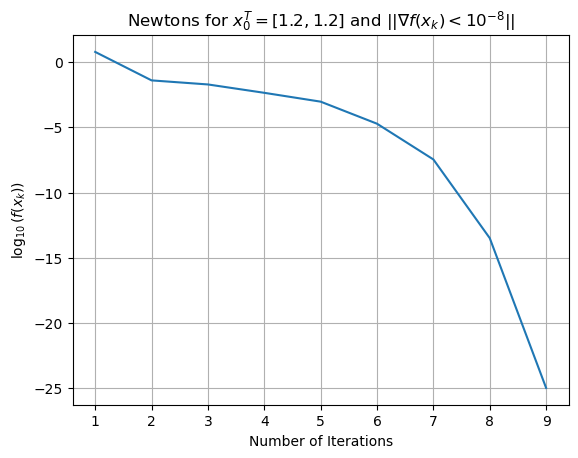

In [16]:
x0 = np.array([1.2, 1.2])
a = backtrack_linesearch(x0, 1e-8, 1e5, f, grad, hess, method='N', tol_mode='GRAD')
y_vals = list(np.log10(a['f(x_k)']))
x_vals = list(range(1, len(y_vals) + 1))

plot(x_vals, y_vals, 'Newtons for $x_0^T = [1.2, 1.2]$ and $||\\nabla f(x_k) < 10^{-8}||$', 'Number of Iterations', '$\log_{10}(f(x_k))$')

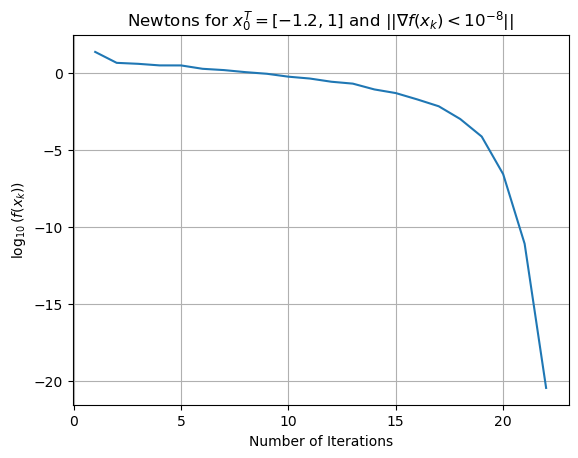

In [17]:
x0 = np.array([-1.2, 1])
a = backtrack_linesearch(x0, 1e-8, 1e5, f, grad, hess, method='N', tol_mode='GRAD')
y_vals = list(np.log10(a['f(x_k)']))
x_vals = list(range(1, len(y_vals) + 1))

plot(x_vals, y_vals, 'Newtons for $x_0^T = [-1.2, 1]$ and $||\\nabla f(x_k) < 10^{-8}||$', 'Number of Iterations', '$\log_{10}(f(x_k))$')

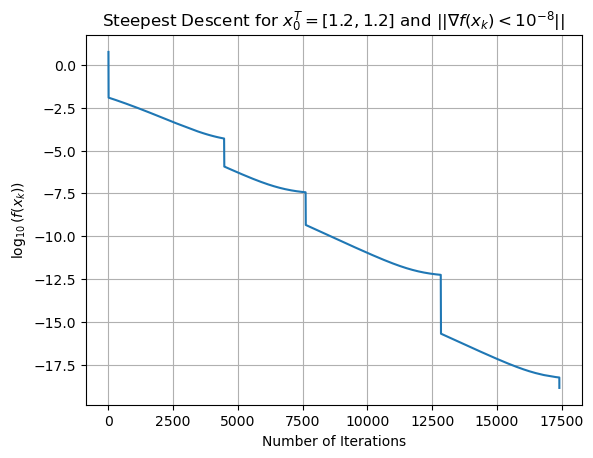

In [18]:
x0 = np.array([1.2, 1.2])
a = backtrack_linesearch(x0, 1e-8, 1e5, f, grad, hess, method='SD', tol_mode='GRAD')
y_vals = list(np.log10(a['f(x_k)']))
x_vals = list(range(1, len(y_vals) + 1))

plot(x_vals, y_vals, 'Steepest Descent for $x_0^T = [1.2, 1.2]$ and $||\\nabla f(x_k) < 10^{-8}||$', 'Number of Iterations', '$\log_{10}(f(x_k))$')

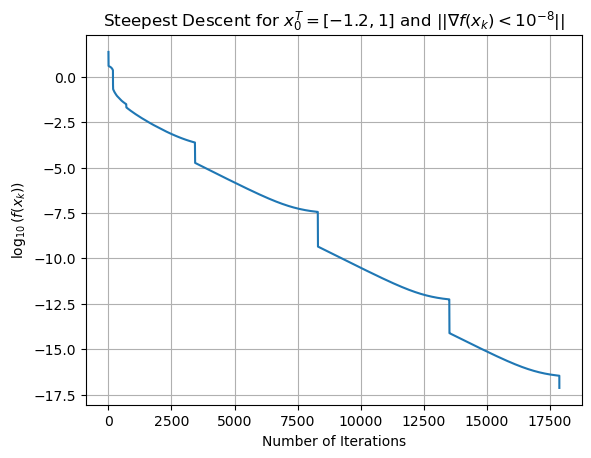

In [19]:
x0 = np.array([-1.2, 1])
a = backtrack_linesearch(x0, 1e-8, 1e5, f, grad, hess, method='SD', tol_mode='GRAD')
y_vals = list(np.log10(a['f(x_k)']))
x_vals = list(range(1, len(y_vals) + 1))

plot(x_vals, y_vals, 'Steepest Descent for $x_0^T = [-1.2, 1]$ and $||\\nabla f(x_k) < 10^{-8}||$', 'Number of Iterations', '$\log_{10}(f(x_k))$')

#### Solution 2 (iii)

We can see that based on the graphs of the steepest decent and newtons method, newtons method converges Q-Quadratically, whereas steepest descent converges Q-Linearly. 

### Problem 3

Let
$$
\begin{align*}
    f(x,y) &= 5 - 5x -2y + 2x^2 + 5xy + 6y^2 \\
    g(x,y) &= \frac{(x^2 - 0.5) + (y^2 - 3) + (x^2 - 1)(y^2 - 4)}{(x^2 + y^2 + 1)^2} \\
    h(x,y) &= \frac{(x^2 - 0.25) + (y^2 - 3) + (x^2 - 0.25)(y^2 - 4)}{(x^2 + y^2 + 1)^2}
\end{align*}
$$

(a) Determine if the function $f(x, y)$ is convex.

(b) Create a contour plot and a surface plot for $f(x, y), g(x, y)$ and $h(x, y)$ using a programming language of your choice. Use $x = [−3, 3]$ and $y = [−3, 3]$

#### Solution 3 (a)

To find if $f(x)$ is convex, we can just check to see if the hessian is positive definite. 
$$
f(x, y) = 5 - 5x - 2y + 2x^2 + 5xy + 6y^2 \\
\nabla f(x, y) = \begin{pmatrix} -5 + 4x + 5y \\ -2 + 5x + 12y \end{pmatrix} \\
\nabla^2 f(x, y) = \begin{pmatrix} 4 &  5 \\ 5 & 12\end{pmatrix} \\
$$
Because the $Tr(\nabla^2 f(x, y)) = 16 > 0$ and $|\nabla^2 f(x, y)| = 23 > 0$, that means the hessian is positive definite which means that $f(x)$ is convex

#### Solution 3 (b)

In [20]:
def plot_contour_surface(f, title):
    [X, Y] = np.meshgrid(np.linspace(-3, 3, 10), np.linspace(-3, 3, 10))
    f_vals = f(X, Y)

    fig, ax = plt.subplots()
    ax.contourf(X, Y, f_vals)
    ax.set_title('Contour Plot - ' + title)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.grid()

    fig = plt.figure()
    ax = plt.axes(projection = '3d')
    ax.plot_surface(X, Y, f_vals, cmap = plt.get_cmap('Blues'))
    ax.set_title('Surface Plot - ' + title)
    ax.set_xlabel('x')
    ax.set_ylabel('y')

    plt.show()

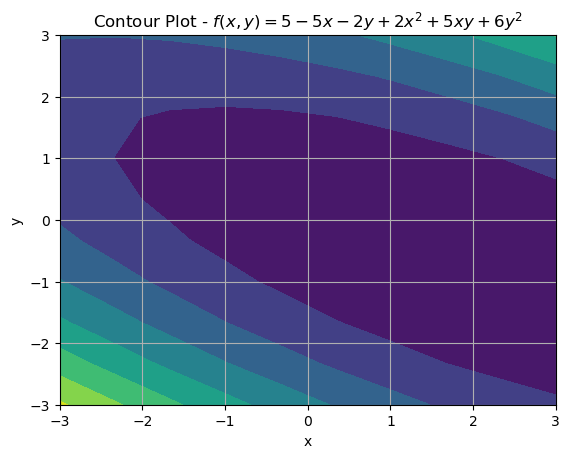

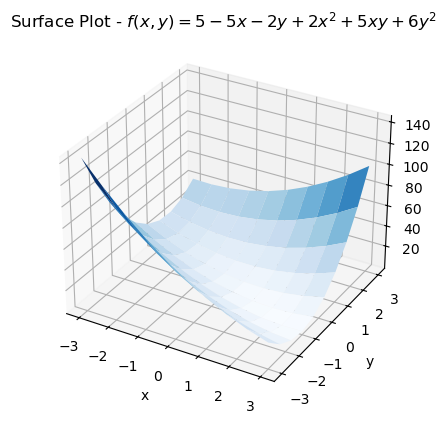

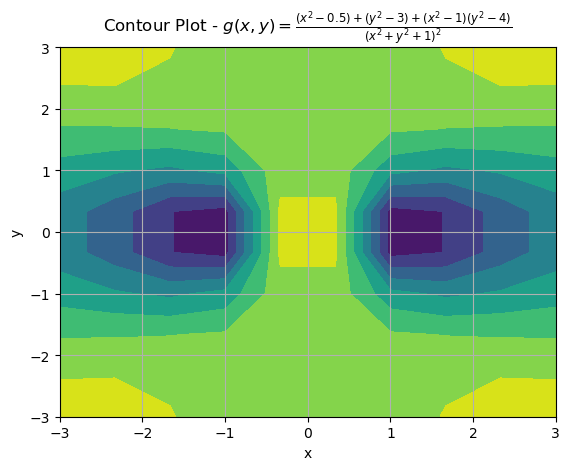

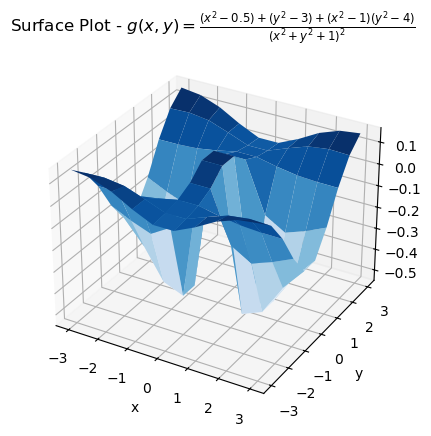

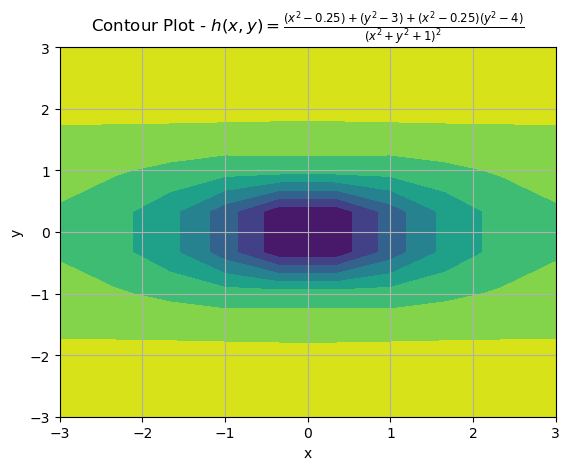

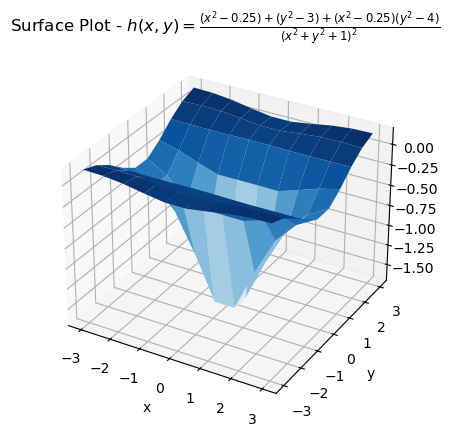

In [21]:
def f(x,y):
    return 5 - 5*x - 2*y + 2*x**2 + 5*x*y + 6*y**2

def g(x,y):
    return ((x**2 - 0.5) + (y**2 - 3) + (x**2 - 1)*(y**2 - 4)) / ((x**2 + y**2 + 1)**2)

def h(x,y):
    return ((x**2 - 0.25) + (y**2 - 3) + (x**2 - 0.25)*(y**2 - 4)) / ((x**2 + y**2 + 1)**2)

plot_contour_surface(f, '$f(x,y) = 5 - 5x -2y + 2x^2 + 5xy + 6y^2$')
plot_contour_surface(g, '$g(x,y) = \\frac{(x^2 - 0.5) + (y^2 - 3) + (x^2 - 1)(y^2 - 4)}{(x^2 + y^2 + 1)^2}$')
plot_contour_surface(h, '$h(x,y) = \\frac{(x^2 - 0.25) + (y^2 - 3) + (x^2 - 0.25)(y^2 - 4)}{(x^2 + y^2 + 1)^2}$')

### Problem 4

(i) Show that the sequence $x_k = 1 + (0.5)^{2^k}$ is Q-quadratically convergent.

(ii) Does the sequence $x_k = 1/k!$ converge Q-superlinearly? or Q-quadratically?

#### Solution 4 (i)

Notice the following tests for 
$$x^* = \lim_{k \rightarrow \infty} 1 + (0.5)^{2^k} = 1$$

Q-Linear Test:
$$ \frac{||x_{k+1} - x^*||}{||x_{k} - x^*||} = \frac{1 + (0.5)^{2^{k + 1}} - 1}{1 + (0.5)^{2^{k}} - 1} = \frac{(0.5)^{2^{k + 1}}}{(0.5)^{2^{k}}} = 0.5^{2^{k + 1} - 2^k}$$

Q-Superlinear Test:
$$ \lim_{k \rightarrow \infty}\frac{||x_{k+1} - x^*||}{||x_{k} - x^*||} = \lim_{k \rightarrow \infty}\frac{1 + (0.5)^{2^{k + 1}} - 1}{1 + (0.5)^{2^{k}} - 1} = \lim_{k \rightarrow \infty}\frac{(0.5)^{2^{k + 1}}}{(0.5)^{2^{k}}} = \lim_{k \rightarrow \infty}0.5^{2^{k + 1} - 2^k}$$

Q-Quadratic Test (PASS):
$$ \frac{||x_{k+1} - x^*||}{||x_{k} - x^*||^2} = \frac{1 + (0.5)^{2^{k + 1}} - 1}{(1 + (0.5)^{2^{k}} - 1)^2} = \frac{(0.5)^{2^{k + 1}}}{(0.5)^{2^{k + 1}}} = 0.5^{2^{k + 1} - 2^{k + 1}} = 1 \leq M \in \mathbb{R}^+ \text{ for any large value k}$$

We can come up to a direct conclusion for the Q-Quadratic Test which shows that the Rate of Convergence with $x^* = 1$ is Q-Quadratic, Q-Superlinear, AND Q-Linear.

Notice the Q-Quadratic Test for 
$$x^* = \lim_{k \rightarrow -\infty} 1 + (0.5)^{2^k} = 2$$

$$ 
\begin{align*}
    \frac{||x_{k+1} - x^*||}{||x_{k} - x^*||^2} &= \frac{1 + (0.5)^{2^{k + 1}} - 2}{(1 + (0.5)^{2^{k}} - 2)^2} = \frac{(0.5)^{2^{k + 1}} - 1}{(0.5)^{2^{k + 1}} + 1 - 2(0.5)^{2^{k}}} \\ 
    &= \frac{(0.5)^{2^{k + 1}} - 1}{(0.5)^{2^{k + 1}} + 1 - (0.5)^{-1}(0.5)^{2^{k}}} = \frac{(0.5)^{2^{k + 1}} - 1}{(0.5)^{2^{k + 1}} + 1 - (0.5)^{2^{k} - 1}} \leq M \in \mathbb{R}^+ \text{ for any large value k}
\end{align*}
$$

We can see that for large values, $k$, we know that the numerator is smaller than the denominator:
$$(0.5)^{2^{k + 1}} - 1 < (0.5)^{2^{k + 1}} + 1 - (0.5)^{2^{k} - 1}$$
such that the quotient converges which implies there exists a real positive value, $M$, that the quotient will always be less than. 

We can come up to a direct conclusion for the Q-Quadratic Test which shows that the Rate of Convergence with $x^* = 2$ is Q-Quadratic, Q-Superlinear, AND Q-Linear.

#### Solution 4 (ii)

Notice the Q-Superlinear Test for
$$x^* = \lim_{k \rightarrow \infty} \frac{1}{k!} = 0$$

$$ \lim_{k \rightarrow \infty}\frac{||x_{k+1} - x^*||}{||x_{k} - x^*||} = \lim_{k \rightarrow \infty}\frac{1/(k+1)!}{1/k!} = \lim_{k \rightarrow \infty}\frac{(k!)}{(k+1)!} = \lim_{k \rightarrow \infty}\frac{(k!)}{(k!)(k + 1)} = \lim_{k \rightarrow \infty}\frac{1}{k + 1} = 0$$


Notice the Q-Quadratic Test:
$$ \frac{||x_{k+1} - x^*||}{||x_{k} - x^*||^2} = \frac{1/(k+1)!}{(1/k!)^2} = \frac{(k!)^2}{(k+1)!} = \frac{(k!)(k!)}{(k!)(k + 1)} = \frac{k!}{k + 1} \not\leq M \in \mathbb{R}^+ \text{ for any large value k}$$

We can come p to a direct conclusion for the Q-Superlinear Test and Failed Q-Quadratic Test which shows that the Rate of Convergence with $x^* = 1$ is Q-Superlinear, AND Q-Linear.


### Problem 5

Consider the one-dimensional function
$$
f(x) = 
\begin{cases}
    (x-1)^2 + 2 & -1 \leq x \leq 1, \\
    2 & 1 \leq x \leq 2, \\
    -(x-2)^2 + 2 & 2 \leq x \leq 2.5, \\
    (x-3)^2 + 1.5 & 2.5 \leq x \leq 4, \\
    -(x-5)^2 + 3.5 & 4 \leq x \leq 6, \\
    -2x + 14.5 & 6 \leq x \leq 6.5, \\
    2x - 11.5 & 6.5 \leq x \leq 8
\end{cases}
$$

defined over the interval $[−1, 8]$. (i) Graph the function. (ii) Identify the strict global maximum point. (iii) Identify the local maximum and the strict local minimum points.

#### Solution 5 (i)

In [22]:
def plot(x_vals_list, y_vals_list, title='plot', xlabel='x', ylabel='y', xlim=None, ylim=None):
    for x_vals, y_vals in zip(x_vals_list, y_vals_list):
        plt.plot(x_vals, y_vals, '-')
    plt.grid()
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if xlim:
        plt.xlim(xlim[0], xlim[1])
    if ylim:
        plt.ylim(ylim[0], ylim[1])

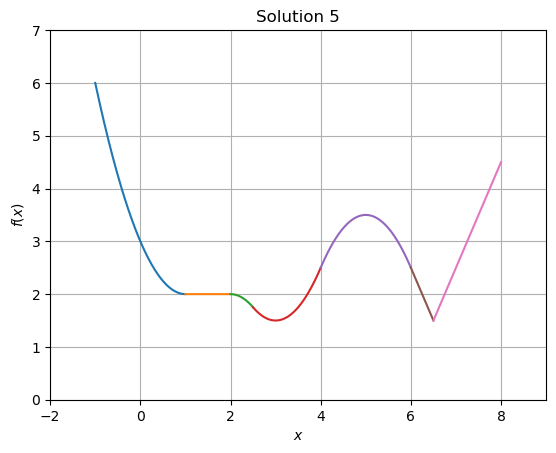

In [23]:
x_vals_list = []
y_vals_list = []

x_vals_list.append(np.linspace(-1, 1, 10_000))
y_vals_list.append((x_vals_list[0] - 1)**2 + 2)

x_vals_list.append(np.linspace(1, 2, 10_000))
y_vals_list.append(2 * np.ones(len(x_vals_list[1])))

x_vals_list.append(np.linspace(2, 2.5, 10_000))
y_vals_list.append(-(x_vals_list[2] - 2)**2 + 2)

x_vals_list.append(np.linspace(2.5, 4, 10_000))
y_vals_list.append((x_vals_list[3] - 3)**2 + 1.5)

x_vals_list.append(np.linspace(4, 6, 10_000))
y_vals_list.append(-(x_vals_list[4] - 5)**2 + 3.5)

x_vals_list.append(np.linspace(6, 6.5, 10_000))
y_vals_list.append(-2 * x_vals_list[5] + 14.5)

x_vals_list.append(np.linspace(6.5, 8, 10_000))
y_vals_list.append(2 * x_vals_list[6] - 11.5)

plot(x_vals_list, y_vals_list, 'Solution 5', '$x$', '$f(x)$', [-2,9], [0, 7])


#### Solution 5 (ii) (iii)

Strict Global Maximum: $(-1, 6)$

Local Maximum: $(2,2)$

Local Minimum: $(1, 2)$

Strict Local Maximum: $(5, 3.5)$

Strict Local Minimum: $(3, 1.5), (6.5, 1.5)$


### Problem 6

Determine if any of the following matrices are positive definite.
$$
A = \begin{pmatrix}
    4 & 2 & 3 \\
    2 & 3 & 2 \\
    3 & 2 & 4
\end{pmatrix}
\qquad
B = \begin{pmatrix}
    2 & 2 & 2 \\
    2 & 2 & 2 \\
    2 & 2 & -1
\end{pmatrix}
\qquad
C = \begin{pmatrix}
    -4 & 1 & 1 \\
    1 & -4 & 1 \\
    1 & 1 & -4
\end{pmatrix}
$$

#### Solution 6

To determine if a matrix is positive definite, we can take note that the matrix must be symmetric and all of its eigenvalues are positive.


Notice $A$ is symmetric. Now we will find its eigenvalues $\lambda$:
$$
\begin{align*}
|A - \lambda I| &= \left|\begin{pmatrix}
    4 - \lambda & 2 & 3 \\
    2 & 3 - \lambda  & 2 \\
    3 & 2 & 4 - \lambda 
\end{pmatrix}\right| = 0 \\
0 &= (4 - \lambda)\bigg((3 - \lambda)(4 - \lambda) - 2(2)\bigg) - 2\bigg((2)(4 - \lambda) - (2)(3)\bigg) + 3\bigg((2)(2) - (3 - \lambda)(3)\bigg) \\
0 &= (4 - \lambda)\bigg(8 - 7\lambda + \lambda^2\bigg) - 2\bigg(2 - 2\lambda\bigg) + 3\bigg(-5 + 3\lambda\bigg) \\
0 &= \bigg(-\lambda^3 + 11\lambda^2 -36\lambda + 32\bigg) + \bigg(-4 + 4\lambda\bigg) + \bigg(-15 + 9\lambda\bigg) \\
0 &= -\lambda^3 + 11\lambda^2 -23\lambda + 13 \\
\end{align*}
$$
By evaluating the graph of this function, we get that all of its eigenvalues are positive such that matrix, $A$ is positive definite

Notice $B$ is symmetric. Now we will find its eigenvalues $\lambda$:
$$
\begin{align*}
|B - \lambda I| &= \left|\begin{pmatrix}
    2 - \lambda & 2 & 2 \\
    2 & 2 - \lambda  & 2 \\
    2 & 2 & -1 - \lambda 
\end{pmatrix}\right| = 0 \\
0 &= (2 - \lambda)\bigg((2 - \lambda)(-1 - \lambda) - 2(2)\bigg) - 2\bigg((2)(-1 - \lambda) - (2)(2)\bigg) + 2\bigg((2)(2) - (2 - \lambda)(2)\bigg) \\
0 &= (2 - \lambda)\bigg(\lambda^2 - \lambda - 6\bigg) - 2\bigg(-6 - 2\lambda\bigg) + 2\bigg(2\lambda\bigg) \\
0 &= \bigg(-\lambda^3 + 3\lambda^2 + 4\lambda - 12\bigg) + \bigg(12 + 4\lambda\bigg) + \bigg(4\lambda\bigg) \\
0 &= -\lambda^3 + 3\lambda^2 + 12\lambda \\
\end{align*}
$$
By evaluating the graph of this function, we get that all of its eigenvalues are NOT positive such that matrix, $B$ is NOT positive definite

Notice $C$ is symmetric. Now we will find its eigenvalues $\lambda$:
$$
\begin{align*}
|C - \lambda I| &= \left|\begin{pmatrix}
    -4 - \lambda & 1 & 1 \\
    1 & -4 - \lambda & 1 \\
    1 & 1 & -4 - \lambda 
\end{pmatrix}\right| = 0 \\
0 &= (-4 - \lambda)\bigg((-4 - \lambda)^2 - 1\bigg) - \bigg((-4 - \lambda) - 1\bigg) + \bigg(1 - (-4 - \lambda)\bigg) \\
0 &= (-4 - \lambda)^3 - (-4 - \lambda) + 2 - 2(-4 - \lambda) \\
0 &= (-4 - \lambda)^3 -3(-4 - \lambda) + 2 \\
\end{align*}
$$
By evaluating the graph of this function, we get that all of its eigenvalues are NOT positive such that matrix, $C$ is NOT positive definite